In [3]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
wine.data.shape

(178, 13)

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target
                                                ,test_size=0.3)

#  决策树和随机森林效果比较

In [7]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

score_c = clf.score(xtest, ytest)
score_r = rfc.score(xtest, ytest)
print("Single tree:{}".format(score_c))
print("Random forest:{}".format(score_r))

Single tree:0.9444444444444444
Random forest:0.9629629629629629


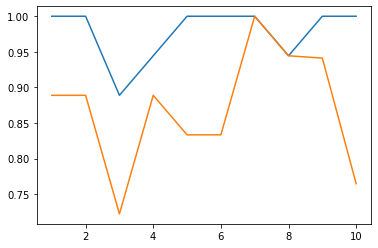

In [8]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier(random_state=0)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label="Random forest")
plt.plot(range(1, 11), clf_s, label="Decision tree")

plt.show()

RandomForestClassifier:
0.961111111111111
DecisionTreeClassifier:
0.8539215686274509


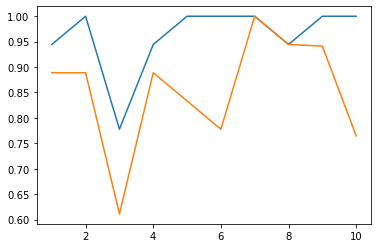

In [14]:
label = "RandomForestClassifier"
for modle in [RandomForestClassifier(n_estimators=10), DecisionTreeClassifier(random_state=10)]:
    score = cross_val_score(modle, wine.data, wine.target, cv=10)
    print("{}:".format(label)), print(score.mean())
    plt.plot(range(1, 11), score, label=label)
    label = "DecisionTreeClassifier"
plt.show()

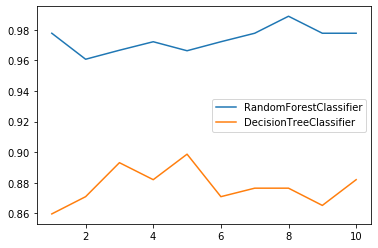

In [17]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target).mean()
    clf_l.append(clf_s)

plt.plot(range(1, 11), rfc_l, label="RandomForestClassifier")
plt.plot(range(1, 11), clf_l, label="DecisionTreeClassifier")
plt.legend()
plt.show()

# n_estimators学习曲线

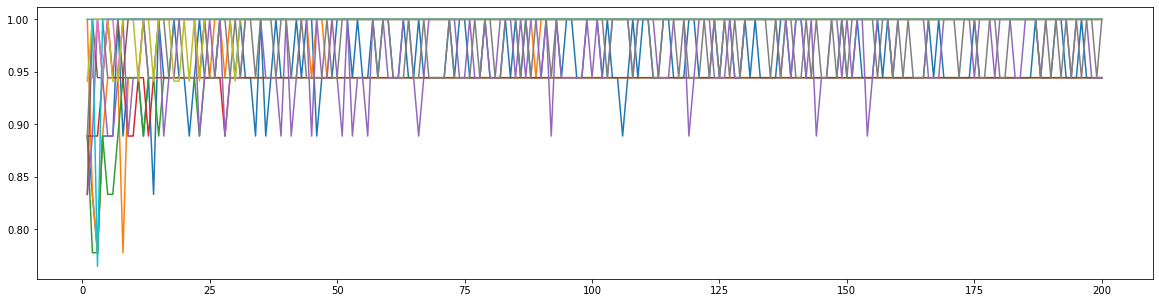

In [21]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)
    superpa.append(rfc_s)
#print(max(superpa).all(), superpa.index(max(superpa)).all())
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201), superpa)
plt.show()

In [23]:
rfc = RandomForestClassifier(n_estimators=25, random_state=2)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [24]:
rfc.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

In [25]:
rfc.estimators_[0].random_state

1872583848

In [26]:
for i in rfc.estimators_:
    print(i.random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [28]:
#查看袋外数据测试
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc.fit(wine.data, wine.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rfc.oob_score_

0.9662921348314607

In [33]:
zip(*(wine.feature_names,rfc.feature_importances_))

In [31]:
rfc.apply(xtest)

array([[13, 10,  4, ..., 14,  4,  3],
       [13,  2,  4, ...,  5,  4,  5],
       [ 6,  5, 17, ..., 17,  7, 14],
       ...,
       [20, 16, 13, ..., 19, 12, 20],
       [20, 16, 13, ..., 19, 12, 20],
       [20, 16, 20, ..., 19, 12, 20]], dtype=int64)

In [35]:
rfc.predict_proba(xtest)

array([[0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.04, 0.92],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.92, 0.04],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.84, 0.12],
       [0.04, 0.08, 0.88],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
 

# 随机森林回归器 

In [43]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import sklearn

In [48]:
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
score = cross_val_score(regressor, boston.data, boston.target, cv=10
               , scoring="neg_mean_squared_error"
               )
score

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [51]:
#sklearn中模型评估打分列表
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']